In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
data = pd.read_csv('../creditcard.csv')

In [3]:
X = data.drop(['Time', 'Class'], axis=1)  
y = data['Class']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(227845, 29) (227845,)
(56962, 29) (56962,)


In [5]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
filename = 'decision_tree_model.joblib'
joblib.dump(model, filename)

['decision_tree_model.joblib']

In [7]:
y_pred = model.predict(X_test)

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9990871107053826

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.76      0.74        98

    accuracy                           1.00     56962
   macro avg       0.86      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962



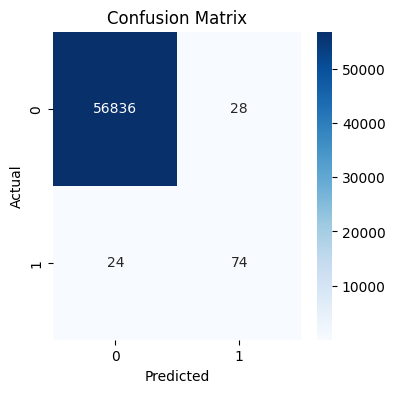

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
# matrix form
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Upsampling
fraudulent = data[data['Class'] == 1]
non_fraudulent = data[data['Class'] == 0]

fraudulent_upsampled = resample(fraudulent, replace=True, n_samples=len(non_fraudulent), random_state=42)

In [11]:
print(len(fraudulent),len(non_fraudulent))
print(len(fraudulent_upsampled))

492 284315
284315


In [12]:
data_balanced = pd.concat([non_fraudulent, fraudulent_upsampled])

In [13]:
X = data_balanced.drop(['Time', 'Class'], axis=1)  
y = data_balanced['Class'] 

In [14]:
print(len(X))
print(len(y))

568630
568630


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(454904, 29) (454904,)
(113726, 29) (113726,)


In [17]:
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [18]:
filename = 'decision_tree_upsampling_model.joblib'
joblib.dump(model, filename)

['decision_tree_upsampling_model.joblib']

In [19]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.7).astype(int) 

print("Accuracy : ",accuracy_score(y_test,y_pred))
print("\nClassification Report with class_weight='balanced' and threshold=0.7:\n", classification_report(y_test, y_pred_prob))


Accuracy :  0.9997977595272849

Classification Report with class_weight='balanced' and threshold=0.7:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56746
           1       1.00      1.00      1.00     56980

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



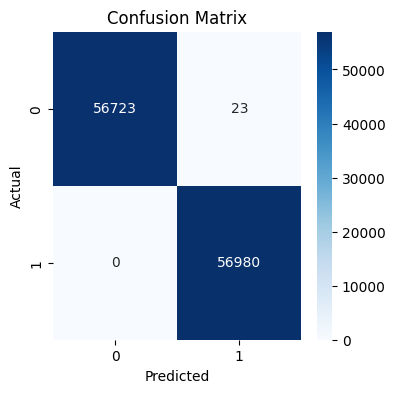

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
# matrix form
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
#downsampling
fraudulent = data[data['Class'] == 1]
non_fraudulent = data[data['Class'] == 0]

non_fraudulent_downsampled = resample(non_fraudulent, replace=False, n_samples=len(fraudulent), random_state=42)

data_balanced = pd.concat([fraudulent, non_fraudulent_downsampled])

In [22]:
X = data_balanced.drop(['Time', 'Class'], axis=1)  
y = data_balanced['Class']  

In [23]:
print(len(X),len(y))

984 984


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [26]:
filename = 'decision_tree_downsampling_model.joblib'
joblib.dump(model, filename)

['decision_tree_downsampling_model.joblib']

In [27]:
y_pred_prob = model.predict_proba(X_test)[:, 1]  
y_pred = (y_pred_prob > 0.3).astype(int)  


print("Accuracy : ",accuracy_score(y_test,y_pred))
print("\nClassification Report with class_weight='balanced' and threshold=0.3:\n", classification_report(y_test, y_pred))


Accuracy :  0.883248730964467

Classification Report with class_weight='balanced' and threshold=0.3:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        98
           1       0.87      0.90      0.89        99

    accuracy                           0.88       197
   macro avg       0.88      0.88      0.88       197
weighted avg       0.88      0.88      0.88       197



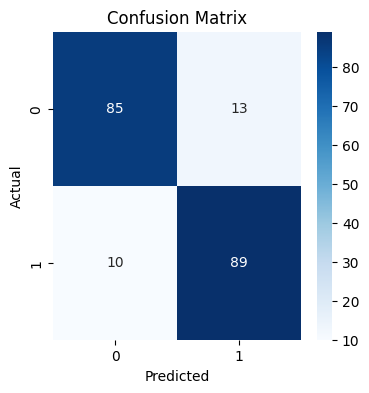

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
# matrix form
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
data = pd.read_csv('../creditcard.csv')

#Select 400 of class 0
class_0_data = data[data['Class'] == 0].sample(n=400, random_state=42)

# Select 400 of class 1
class_1_data = data[data['Class'] == 1].sample(n=400, random_state=42)

# on combining selected data points
selected_data = pd.concat([class_0_data, class_1_data])

# new csv file is used for datamodelling..etc
selected_data.to_csv('selected_dataset.csv', index=False)

In [31]:
data=pd.read_csv('selected_dataset.csv')


X = data.drop(['Time', 'Class'], axis=1)  
y = data['Class'] 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [33]:
filename = 'decision_tree_400_each_model.joblib'
joblib.dump(model, filename)

['decision_tree_400_each_model.joblib']

In [34]:
y_pred = model.predict(X_test)

In [35]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.91875

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        80
           1       0.89      0.95      0.92        80

    accuracy                           0.92       160
   macro avg       0.92      0.92      0.92       160
weighted avg       0.92      0.92      0.92       160



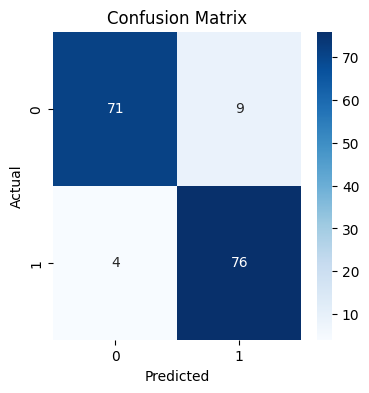

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
# matrix form
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()